# Collatz conjecture


The Collatz conjecture is a conjecture in mathematics named after Lothar Collatz. It concerns a sequence defined as follows: 

* Start with any positive integer $n$.

* Then each term is obtained from the previous term as follows: 

    - If the previous term is even, the next term is one half the previous term. 
    - Otherwise, the next term is 3 times the previous term plus 1.

The conjecture is that **no matter what value of $n$, the sequence will always reach 1.**

In modular arithmetic notation, define the function $f$ as follows:

$$ f(n)={\begin{cases}n/2&{\text{if }}n\equiv 0{\pmod {2}}\\3n+1&{\text{if }}n\equiv 1{\pmod {2}}.\end{cases}} $$

Now form a sequence by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input at the next.

>Mathematics may not be ready for such problems.
<div class=col-md-8 style="text-align: right">_Paul Erdős_</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [110]:
def is_odd(num):
    return num % 2 != 0

def collatz(n):
    
    if n == 0:
        raise ValueError('cannot start from 0')
        
    seq = [n]
    
    while seq[-1] != 1:
        
        if is_odd(seq[-1]):
            seq.append(3*seq[-1]+1)
            
        else:
            seq.append(seq[-1]//2)

    return seq        

Generate sequences for 100.000 random integers between 20.000 and 3.000.000 :

In [111]:
numbers = np.random.randint(20000,3000000, 100000)
lst_coll = [collatz(x) for x in numbers]

# length of each sequence
lengs = [len(x) for x in lst_coll]

Sequence length distribution:

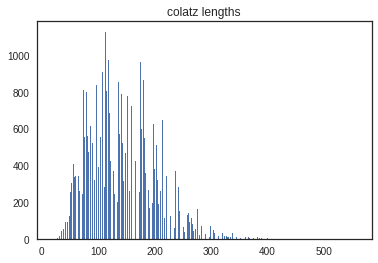

In [112]:
plt.hist(lengs, bins= 1000)
plt.title('colatz lengths')

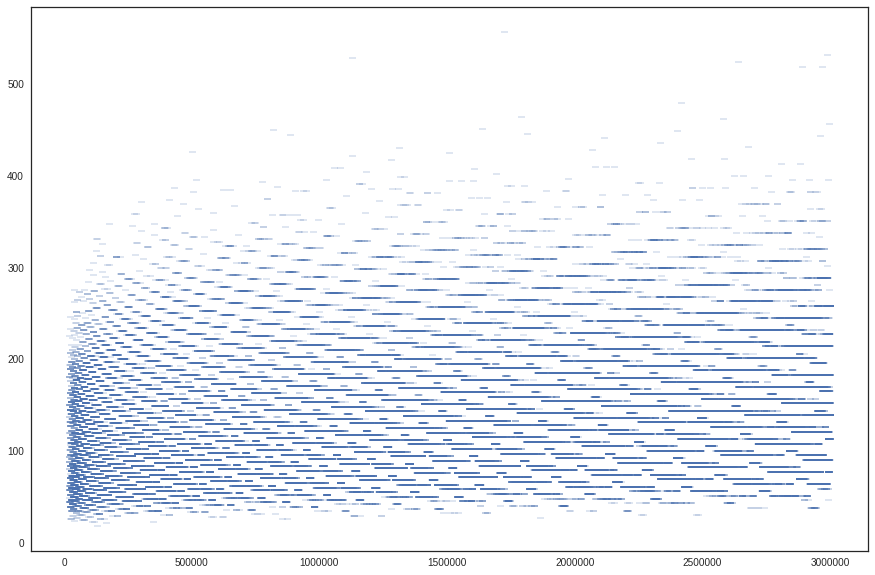

In [113]:
plt.figure(figsize=(15, 10))
plt.scatter(numbers, lengs, marker='_', c='C0', alpha = 0.2)

Means of the sequences:

(0, 1000)

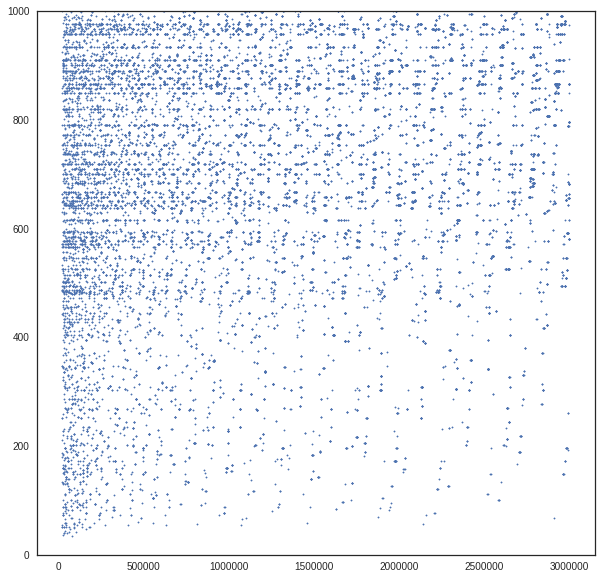

In [120]:
mean_seq = [np.median(x) for x in lst_coll]

plt.figure(figsize=(10, 10))
plt.scatter(numbers, mean_seq, s = 2)
plt.ylim(0,1000)

Generate sequences for numbers ranging from 10 to 10.000

In [ ]:
# Si volem una sola llista de tuples:
# max_num = list(zip(nrange,max_num))

n_seq = np.arange(10,10000)
seq_coll = [colatz(x) for x in n_seq]
max_seq = [max(x) for x in seq_coll]

Plot of the the max number in each sequence for each starting number:

(0, 100000)

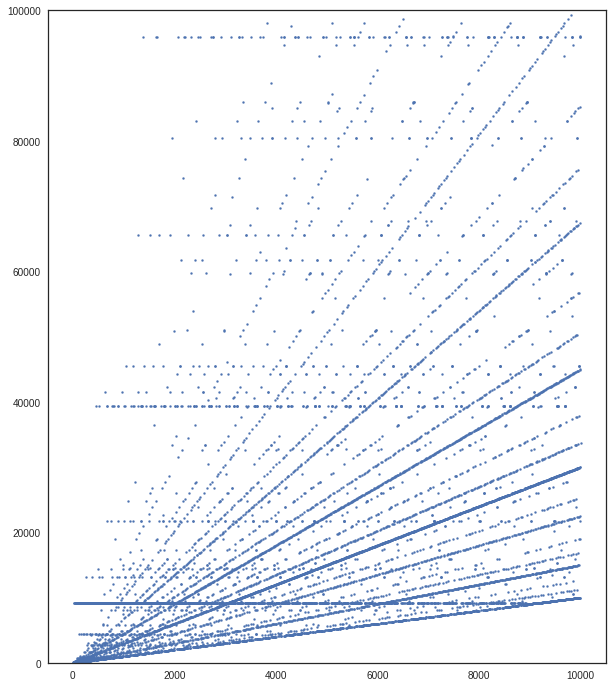

In [41]:
plt.figure(figsize=(10, 12))
plt.scatter(n_seq, max_seq, s = 4)
plt.ylim(0,100000)

(0, 2000)

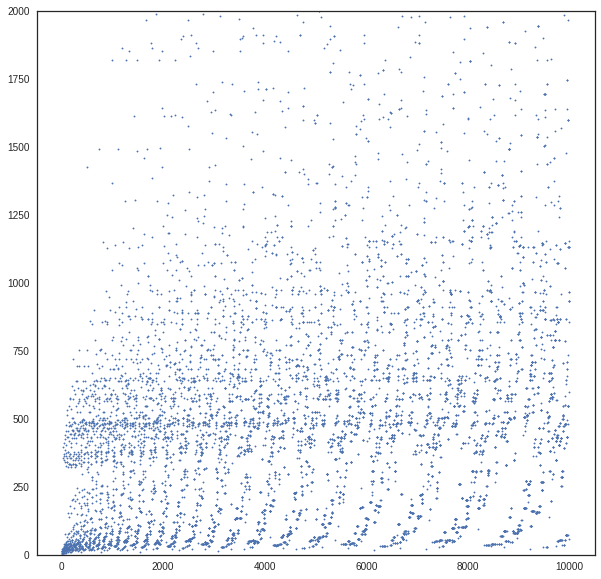

In [119]:
mean_seq = [np.median(x) for x in seq_coll]

plt.figure(figsize=(10, 10))
plt.scatter(n_seq, mean_seq, s = 2)
plt.ylim(0,2000)

## Reverse Collatz relation

There is another approach to prove the conjecture, which considers the bottom-up method of growing the so-called Collatz graph. The Collatz graph is a graph defined by the inverse relation.

$$ R(n)={\begin{cases}\{2n\}&{\text{if }}n\equiv 0,1,2,3,5\\\{2n,(n-1)/3\}&{\text{if }}n\equiv 4\end{cases}}{\pmod {6}}. $$

Instead of proving that all positive integers eventually lead to 1, we can try to prove that **1 leads to all positive integers**.

In [53]:
def odd_above(n):
    return n % 6 == 4

In [63]:
2//3

0

In [99]:
bigNumber = 1000
oddDegChange = 1.2
evenDegChange = -0.54

oddradchange = oddDegChange * np.pi / 180
evenradchange = evenDegChange * np.pi / 180

lst = weigth = np.zeros(bigNumber, dtype='int')

In [100]:
def collatz_req(n):
    weigth[n] += 1
    if n == 1:
        return
    if n%2 == 0:
        lst[n] = n//2
        collatz_req(n//2)
    else:
        lst[n] = 3*n+1
        if 3*n+1 <= bigNumber:
            collatz_req(3*n+1)

In [101]:
for n in range(bigNumber):
    collatz_req(n)

RecursionError: maximum recursion depth exceeded in comparison

In [103]:
lst

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [75]:
weigth

array([2, 0, 0, ..., 0, 0, 0])

In [83]:
collatz_req(2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [82]:
lst

array([0, 1, 0, ..., 0, 0, 0])